In [3]:
import tensorflow as tf
import os

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [9]:

import numpy as np
import matplotlib.pyplot as plt


from tensorflow import keras
from keras.models import Model
from keras.layers import Flatten, Dense

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing import image_dataset_from_directory

from sklearn.metrics import confusion_matrix, classification_report

In [21]:
train_path = tf.keras.utils.image_dataset_from_directory("train_alz")
test_path = tf.keras.utils.image_dataset_from_directory("test_alz")

Found 5121 files belonging to 4 classes.
Found 1279 files belonging to 4 classes.


In [34]:
train_iterator = train_path.as_numpy_iterator()
test_iterator = test_path.as_numpy_iterator()

TypeError: '_PrefetchDataset' object is not subscriptable

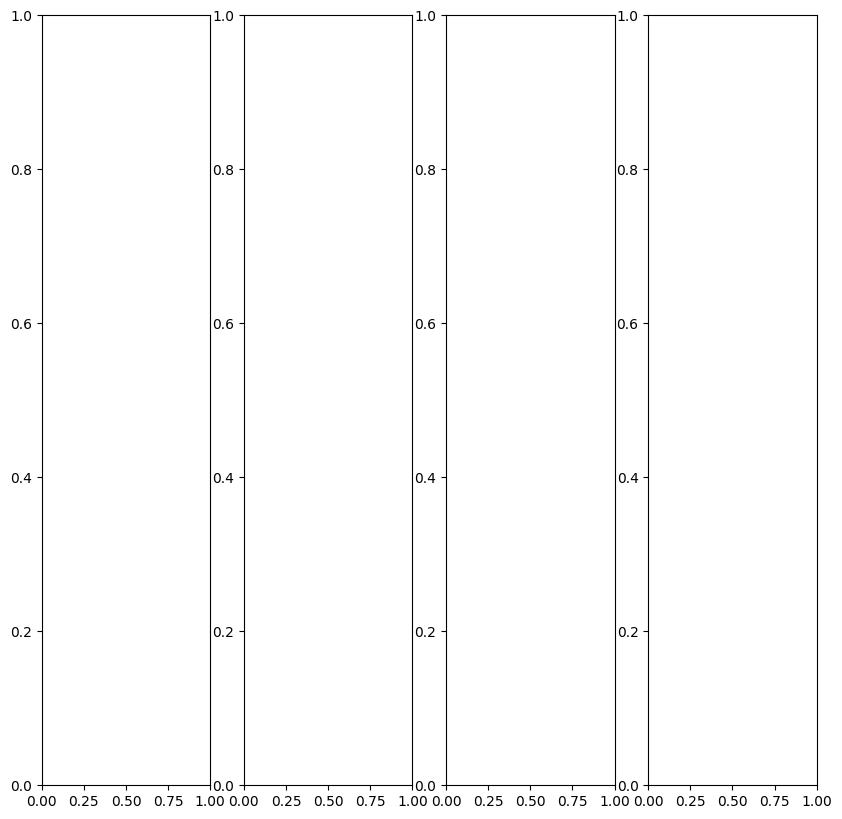

In [38]:
ax = plt.subplots(ncols=4, figsize=(10,10))
for idx, img in enumerate(train_path[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_path[1][idx])

In [44]:
from keras.applications.resnet_v2 import ResNet152V2

base_model = keras.applications.ResNet152V2(
    include_top=False,
    weights="imagenet",
    input_shape=(256, 256, 3)
)

for layer in base_model.layers:
    layer.trainable = False

In [45]:
X = Flatten()(base_model.output)
X = Dense(units = 4, activation = 'softmax')(X)

model = Model(base_model.input, X)

In [46]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01,
                   patience = 3, verbose = 1, mode = 'auto')

mc = ModelCheckpoint('./model.h5', monitor = 'val_accuracy',
                     save_best_only=True, verbose = 1, mode = 'auto')

cb = [es, mc]

history = model.fit(train_path, validation_data=test_path, epochs=10, callbacks=cb)

Epoch 1/10


 24/161 [===>..........................] - ETA: 15:00 - loss: 6355.8853 - accuracy: 0.3893